In [3]:
import pandas as pd
import seaborn as sns

In [4]:
# load all csvs in the Data folder that contain the word review
# and concatenate them into one dataframe
import glob
path = r'Data'
all_files = glob.glob(path + "/*review*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [5]:
# count the number of rows in the dataframe
len(df)

22524

<Axes: xlabel='Quality', ylabel='count'>

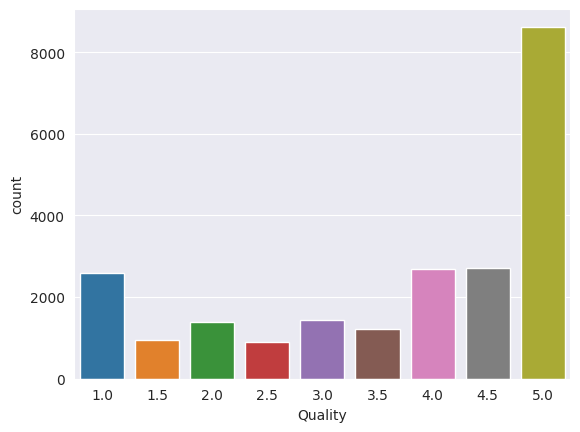

In [6]:
# plot the distrobution of the ratings
sns.countplot(x='Quality', data=df)

In [7]:
# count the nuber of datasets in li
len(li)

6

In [23]:
# display the most common tags in the datasets
from collections import Counter
tags = []
for i in range(len(li)):
    tags.extend(li[i]['Tags'])
tag_counts = Counter(tags)
tag_counts.most_common(20)

[('[]', 19566),
 ("['TOUGH GRADER']", 29),
 ("['GIVES GOOD FEEDBACK', 'RESPECTED', 'CARING']", 26),
 ("['RESPECTED', 'INSPIRATIONAL', 'CARING']", 25),
 ("['TOUGH GRADER', 'LOTS OF HOMEWORK']", 21),
 ("['LOTS OF HOMEWORK']", 21),
 ("['TOUGH GRADER', 'GET READY TO READ', 'LOTS OF HOMEWORK']", 20),
 ("['RESPECTED', 'INSPIRATIONAL', 'AMAZING LECTURES']", 20),
 ("['GIVES GOOD FEEDBACK', 'ACCESSIBLE OUTSIDE CLASS', 'CARING']", 19),
 ("['GIVES GOOD FEEDBACK', 'RESPECTED', 'ACCESSIBLE OUTSIDE CLASS']", 18),
 ("['GET READY TO READ', 'LOTS OF HOMEWORK']", 18),
 ("['GIVES GOOD FEEDBACK', 'CLEAR GRADING CRITERIA', 'CARING']", 18),
 ("['LECTURE HEAVY']", 17),
 ("['CLEAR GRADING CRITERIA']", 17),
 ("['GIVES GOOD FEEDBACK', 'PARTICIPATION MATTERS', 'CLEAR GRADING CRITERIA']",
  17),
 ('[\'TOUGH GRADER\', "SKIP CLASS? YOU WON\'T PASS.", \'LOTS OF HOMEWORK\']',
  16),
 ('[\'TOUGH GRADER\', \'GET READY TO READ\', "SKIP CLASS? YOU WON\'T PASS."]',
  15),
 ("['GIVES GOOD FEEDBACK', 'GET READY TO READ', 'P

In [41]:
# display the most common individual elements found in the tags in the datasets
from collections import Counter
tags = []
for i in range(len(li)):
    tags.extend(li[i]['Tags'].str.split(','))
#tag_counts = Counter(tags)
#tag_counts.most_common(20)
print(tags[:200])

[['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ["['TOUGH GRADER'", ' "SKIP CLASS? YOU WON\'T PASS."', " 'EXTRA CREDIT']"], ['["SKIP CLASS? YOU WON\'T PASS."]'], ['[]'], ["['TOUGH GRADER'", " 'GET READY TO READ']"], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ["['SUCKS!']"], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ['[]'], ["['GET READY TO READ'", ' "SKIP CLASS? YOU WON\'T PASS."', " 'BEWARE OF POP QUIZZES']"], ['[]'], ['[]'], ["['GET READY TO READ'", " 'LOTS OF HOMEWORK'", " 'LECTURE HEAVY']"], ['[]'], ['[]'], ['[]'], ["['GIVES GOOD FEEDBACK'", " 'GET READY TO READ'", " 'AMAZING LECTURES']"], ['[

In [18]:
# display the least common tags in the datasets
tag_counts.most_common()[-10:]

[("['PARTICIPATION MATTERS', 'AMAZING LECTURES', 'GIVES GOOD FEEDBACK']", 1),
 ("['PARTICIPATION MATTERS', 'GRADED BY FEW THINGS', 'HILARIOUS']", 1),
 ("['HE IS HOT!!!']", 1),
 ("['GIVES GOOD FEEDBACK', 'ACCESSIBLE OUTSIDE CLASS', 'INSPIRATIONAL']", 1),
 ("['CS 2']", 1),
 ('[\'PARTICIPATION MATTERS\', "SKIP CLASS? YOU WON\'T PASS.", \'EXTRA CREDIT\']',
  1),
 ("['EXTRA CREDIT', 'TEST HEAVY', 'ACCESSIBLE OUTSIDE CLASS']", 1),
 ("['LOTS OF HOMEWORK', 'PARTICIPATION MATTERS', 'HILARIOUS']", 1),
 ('[\'LOTS OF HOMEWORK\', "SKIP CLASS? YOU WON\'T PASS.", \'AMAZING LECTURES\']',
  1),
 ("['JUST DO HIS HOME WORK AND YOU WILL GET AN EASY A.']", 1)]

In [16]:
# show the quality rating of people who included 'TOUGH GRADER' in the tags
df[df['Tags'].str.contains('TOUGH GRADER')]['Quality'].value_counts()

Quality
1.0    225
2.0     95
3.0     82
4.0     75
5.0     49
Name: count, dtype: int64

In [10]:
# count how many times "TOUGH GRADER" appears in the tags
df['Tags'].str.contains('TOUGH GRADER').value_counts()

Tags
False    21998
True       526
Name: count, dtype: int64

In [11]:
# show the quality rating of people who included 'GIVES GOOD FEEDBACK' in the tags nad graph it
df[df['Tags'].str.contains('GIVES GOOD FEEDBACK')]['Quality'].value_counts()

Quality
5.0    463
4.0    112
3.0     24
2.0      9
1.0      2
Name: count, dtype: int64

In [22]:
# show any comments that contain "HOT", include ID and Quality
df[df['Comment'].str.contains('HOT')][['ID', 'Quality', 'Comment']]

,ID,Quality,Comment
1803,916702,5.0,This was a very tough class for me but it didn...
2614,408632,5.0,"HOTT! I find history boring, but he's so passi..."
2626,408632,5.0,He's awesome and HOT! Great class! I don't rem...
2638,408632,5.0,MMM AARON WAS A HOTTIE SO YOU WONT HAVE TROUBL...
2895,447754,5.0,Fantastic man and hope he is doing well...very...
6764,578105,5.0,HOT EASY BUT YOU LEARN YOUR STUFF. i CAN'T WAI...
8262,441620,5.0,"She is very nice, very helpful, very knowlegda..."
8758,362045,5.0,"At first, i speak like i lerned my words at th..."
12522,138287,5.0,This guy is absolutely gorgeous! ****ing nice ...
13059,190436,5.0,SUUUUUUPER HOT! And she is a great professor. ...


In [55]:
# count the types of "class_name"
#df['Class_Name'].value_counts()

# count the types of "class_name", include only uppercase letters
df['Class_Name'].str.extract(r'([A-Z]+)').value_counts()

MATH             1161
HIST             1137
ENGL              896
CHEM              889
BIO               767
                 ... 
INTROTOANALYS       1
INTROTOANAL         1
INTROTOACCT         1
INTROTOA            1
LEISALL             1
Name: count, Length: 2871, dtype: int64

In [51]:
# find every review that has "waste" or "useless" in the comment
df[df['Comment'].str.contains('waste|useless', case=False)][['ID', 'Quality', 'Comment']]

,ID,Quality,Comment
59,742183,1.0,She is hard to understand and gives examples t...
66,493409,1.0,"Horrible teacher. He's smart, and thats it, he..."
73,493409,2.5,All I have to say is that this class is ridicu...
108,258301,2.5,I thought he was going to be a decent teacher....
180,615,4.0,Dr. Rockley has a great passion for teaching a...
...,...,...,...
21943,180076,1.0,This class should be named Trivial Pursiut 101...
21945,179784,4.0,he was available anytime. taught well in class...
22082,188430,4.0,He is very funny and his class flows easily. O...
22346,267091,1.5,He told me I couldn't major in BOTH Computer S...


In [53]:
# count the number of yes vs no under would take again
df['take_again'].value_counts()


take_again
 Yes    2213
 No      859
Name: count, dtype: int64

<Axes: xlabel='Date_Taken'>

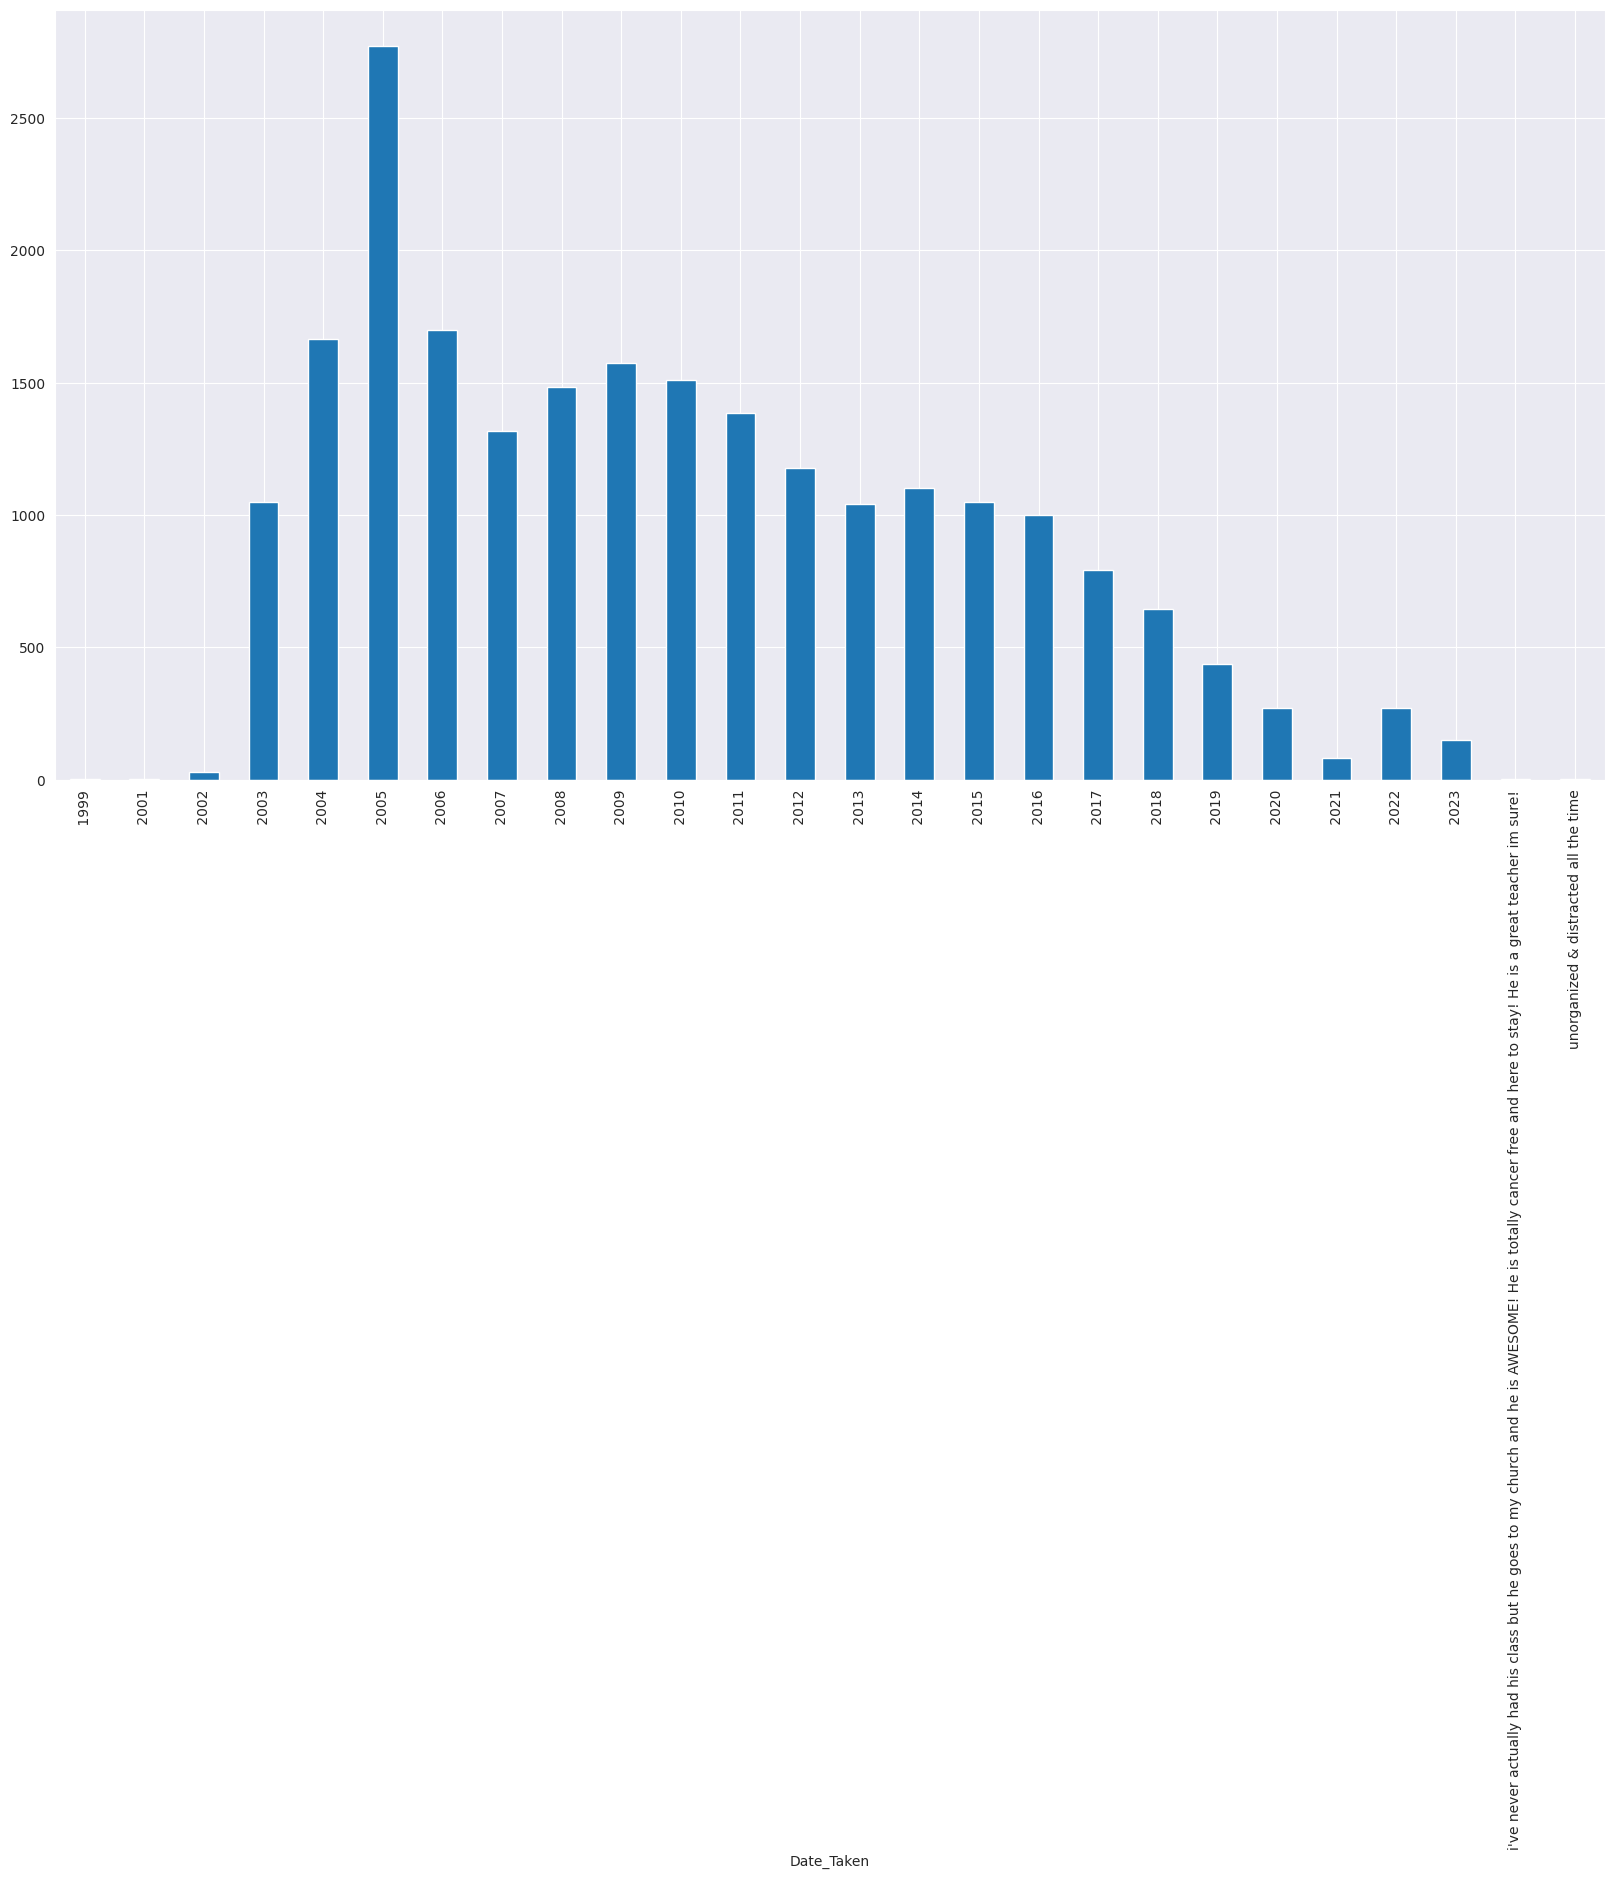

In [62]:
# graph a distrobution the the dates of the reviews, split after , and take the last element, order by x axis
df['Date_Taken'].str.split(',').str[-1].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

In [66]:
# show the revies made in 1999
df[df['Date_Taken'].str.contains('2002')][['ID', 'Quality', 'Comment']]

,ID,Quality,Comment
670,49876,4.5,"May 2nd, 2002"
789,66495,3.0,"Oct 2nd, 2002"
964,104817,2.0,"Dec 23rd, 2002"
10700,13337,5.0,"Wonderful teacher, knows a lot about her subje..."
10701,13337,2.5,She thinks she's teaching high school. I don't...
10778,49945,5.0,easy as long as you do the work and participat...
10802,58609,5.0,Who is greater? Not one is greater than George...
10930,67545,5.0,Very funny and very enlightening ideas. Some m...
11034,67557,5.0,"Dec 11th, 2002"
11067,67563,2.0,"Dec 16th, 2002"


# start here

In [1]:
positives = ['kind','understanding', 'caring', 'helpful', 'nice', 'good', 'great', 'awesome', 'amazing', 'fantastic', 'excellent', 'best', 'favorite', 'love', 'loved', 'like', 'liked', 'enjoyed', 'enjoyable', 'fun', 'funny', 'humorous', 'interesting', 'inspiring', 'inspirational', 'insightful', 'knowledgeable', 'smart', 'intelligent', 'brilliant', 'genius', 'easy', 'easier', 'easiest', 'clear', 'clearer', 'clearest', 'concise', 'conciser', 'concisest', 'organized', 'organized', 'organized', 'fair', 'fairer', 'fairest', 'reasonable', 'reasonable', 'reasonabest', 'reasonable', 'reasonable']
# a list of negitives that are the opposite of the positives
negatives = ['mean', 'rude', 'unhelpful', 'unfriendly', 'bad', 'terrible', 'horrible', 'awful', 'worst', 'least', 'dislike', 'dislike', 'old', 'boring', 'bored', 'waste']

<Axes: xlabel='Comment'>

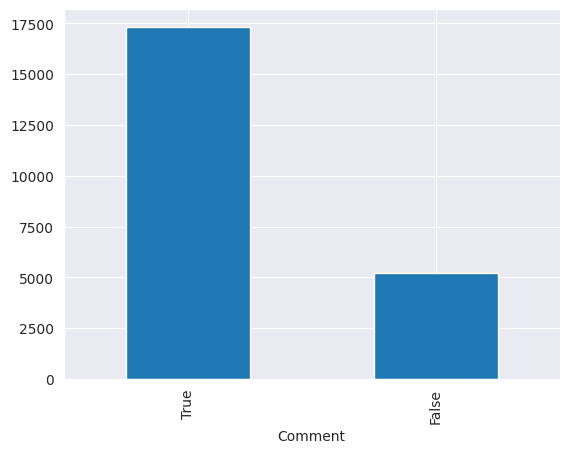

In [17]:
# graph how many comments contain a positive word
df['Comment'].str.contains('|'.join(positives), case=False).value_counts().plot(kind='bar')

<Axes: xlabel='Comment'>

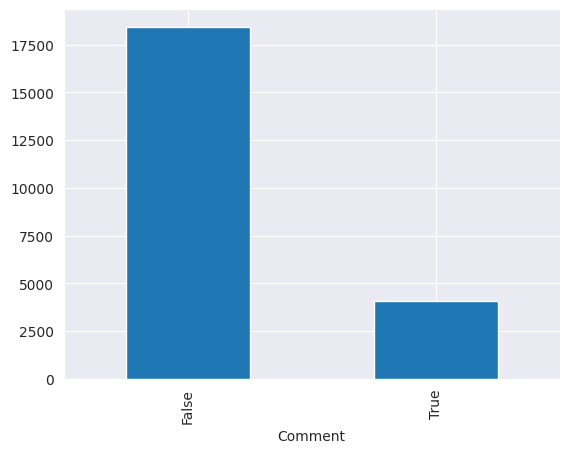

In [19]:
# graph how many times a negative word appears in the comments, put true on top
df['Comment'].str.contains('|'.join(negatives), case=False).value_counts().sort_index().plot(kind='bar')